# Solución a Actividad Interpolación.

Importación de librerías a utilizar:

In [144]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import sympy as sp
from scipy import interpolate
import math

Construcción del programa para calcular interpolación lineal:

a). Para deducir el método de interpolación, y basado en el material bibliográfico, notamos como lo más natural para unir dos puntos es a travez de una linea recta. De esta  manera vamos a tener que la interpolación lineal no es más que un arreglo para encontrar una recta que una dos puntos; donde por medio de la ecuación Punto-Pendiente de una recta tenemos:

$y = m x + b$

dónde:

\begin{equation}
m =  \frac { y_{i+1} - y_i}{x_{i+1} - x_i}
\end{equation} y podemos utilizar cualquiera de los dos puntos para despejar el intercepto b; en este caso usaremos el punto ($x_i, y_i$):

 \begin{equation}
b = y_i - \frac { y_{i+1} - y_i}{x_{i+1} - x_i} x_i
 \end{equation}


 Así, podemos notar que la ecuación recurrente en el método de la interpolación lineal es:

 \begin{equation}
f(x) = \frac { y_{i+1} - y_i}{x_{i+1} - x_i} (x-x_i)  + y_i
 \end{equation}

b).  Primero especificando 3 puntos a interpolar:

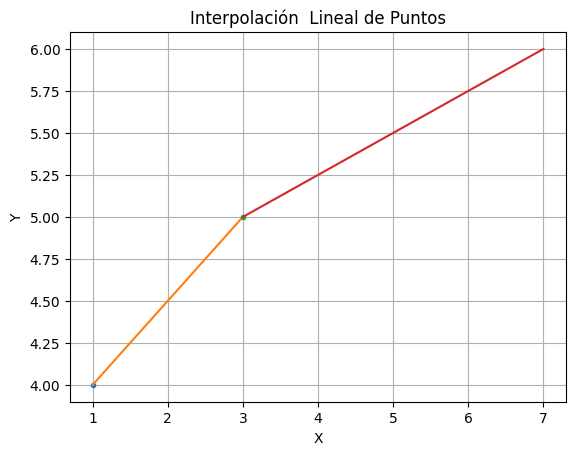

In [9]:
#Puntos iniciales:
x=np.array([1,3,7])
y=np.array([4,5,6])

#Definiendo la longitud de datos:
n=len(x)

#Ciclo para determiar interpolaciòn en puntos:
for i in range(n-1):

  X=np.linspace(x[i],x[i+1],2)
  m=(y[i+1]-y[i])/(x[i+1]-x[i])         #Ecuaciòn para interpolación lineal.
  f = m*(X-x[i]) + y[i]
  plt.plot(x[i],y[i], ".")              #Gaficaciòn de Puntos
  plt.plot(X,f)                         #Grafica de Rectas.

# Detalles de gràfica
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.title("Interpolación  Lineal de Puntos")
plt.show()



2. Código Markdown para interpolación de puntos: (2,4) y (5,1).

```js
#Puntos iniciales:
x=np.array([2,5])
y=np.array([4,1])

#Definiendo la longitud de datos:
n=len(x)

#Ciclo para determiar interpolaciòn en puntos:
for i in range(n-1):

  X=np.linspace(x[i],x[i+1],2)
  m=(y[i+1]-y[i])/(x[i+1]-x[i])         #Ecuaciòn para interpolación lineal.
  f = m*(X-x[i]) + y[i]
  plt.plot(x[i],y[i], ".")              #Gaficaciòn de Puntos
  plt.plot(X,f)                         #Grafica de Rectas.

# Detalles de gràfica
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.title("Interpolación  Lineal de Puntos")
plt.show()

```

#Interpolación de Lagrange:

Según lo visto en clase, desarrollamos un código para hacer interpolación de Lagrange, primero para los 3 puntos anteriores dados.



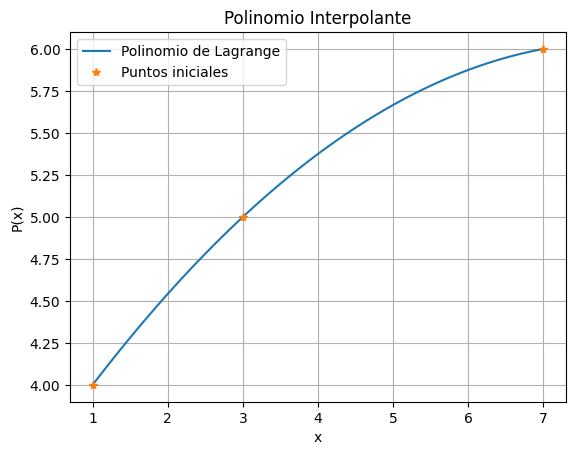

In [21]:
# Definiendo la productoria para encontrar L_(x):
def L(j,v,x):
  l=1
  for i in range(len(v)):
    if i != j:

      l *= (x-v[i])/(v[j]-v[i])

  return l

# n es el numero de puntos:
def P(Y,v,n):
  p=0
  for j in range(n):

    p += Y[j]*L(j,v,x)

  return p


#Condiciones iniciales dadas:

# Defno x como variable y encuentro polinomios:
x= sp.Symbol("x")

#Puntos en x:
X=[1,3,7]

#Puntos en Y:
Y=[4,5,6]

#Llamamos el polinomio de lagrange con los vectores y el numero de puntos:

p= P(Y,X,3)

sp.simplify(p)

#Pasamos el polinomio al módulo Numpy:

p_num = sp.lambdify(x,p,'numpy')

#Generamos valores para las gráficas:

x_v = np.linspace(X[0],X[-1],100)
y_v = p_num(x_v)

#Gráfico:
plt.plot(x_v, y_v, label='Polinomio de Lagrange')
plt.plot(X,Y,'*', label='Puntos iniciales')
plt.title('Polinomio Interpolante')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid()
plt.show()


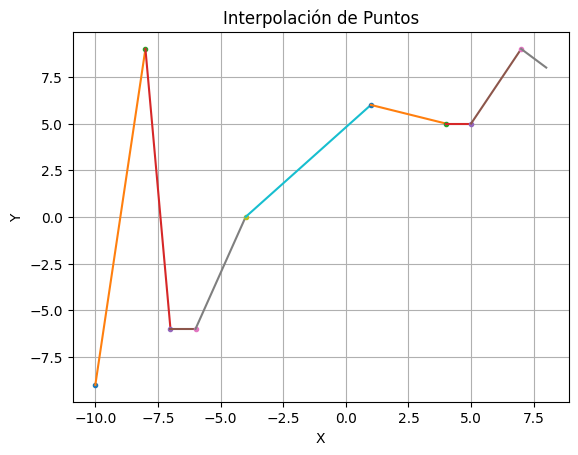

In [43]:
# Generalizando para puntos aleatorios el método lineal:

#Numero de puntos:

n = 10

#Creación de Arrays vacíos:
X = np.zeros(n)
y = np.zeros(n)

#Generaciòn de puntos x aleatorios sin repetición:
for j in range(n):
    p = np.random.randint(-n,n)
    while p in X:
        p = np.random.randint(-n,n)
    X[j] = p
    y[j] = np.random.randint(-n, n)

# Ordenar el array x en orden ascendente
X = np.sort(X)


#Interpolación:
for i in range(n-1):

  XX=np.linspace(X[i],X[i+1],2)
  m=(y[i+1]-y[i])/(X[i+1]-X[i])
  f = m*(XX-X[i]) + y[i]
  plt.plot(X[i],y[i], ".")
  plt.plot(XX,f, label='Polinomio lineal')


plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.title("Interpolación de Puntos")
plt.show()


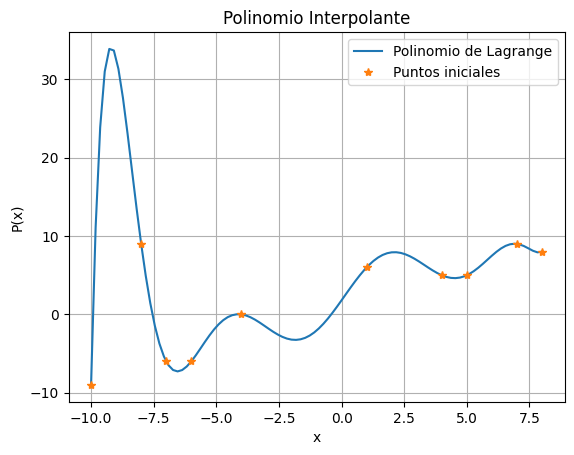

In [44]:
#Condiciones iniciales dadas:

# Defno x como variable y encuentro polinomios:
x= sp.Symbol("x")

#Llamamos el polinomio de lagrange con los vectores y el numero de puntos:

p= P(y,X,n)

sp.simplify(p)

#Pasamos el polinomio al módulo Numpy:

p_num = sp.lambdify(x,p,'numpy')

#Generamos valores para las gráficas:

x_v = np.linspace(X[0],X[-1],100)
y_v = p_num(x_v)

#Gráfico:
plt.plot(x_v, y_v, label='Polinomio de Lagrange')
plt.plot(X,y,'*', label='Puntos iniciales')
plt.title('Polinomio Interpolante')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid()
plt.show()


Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5



El polinomio de lagrange para  4 es:  
        4             3         2
3.316 x + 1.041e-17 x - 4.277 x + 5.204e-18 x + 1


El polinomio de lagrange para  8 es:  
        8             7         6             5         4             3
53.69 x - 6.661e-15 x - 102.8 x + 1.899e-14 x + 61.37 x - 1.134e-14 x
         2
 - 13.2 x - 8.554e-16 x + 1


El polinomio de lagrange para  12 es:  
        12             11        10             9        8             7
909.9 x  - 1.098e-12 x  - 2336 x  - 1.838e-11 x + 2202 x - 1.946e-12 x
          6             5         4             3         2
 - 955.4 x + 2.929e-13 x + 198.7 x + 7.632e-14 x - 19.58 x - 4.255e-15 x + 1


El polinomio de lagrange para  16 es:  
           16             15             14             13
1.54e+04 x  - 8.588e-11 x  - 4.971e+04 x  + 7.641e-10 x 
              12             11             10             9
 + 6.374e+04 x  + 3.534e-09 x  - 4.187e+04 x  + 1.819e-09 x
              8             7        6             5 

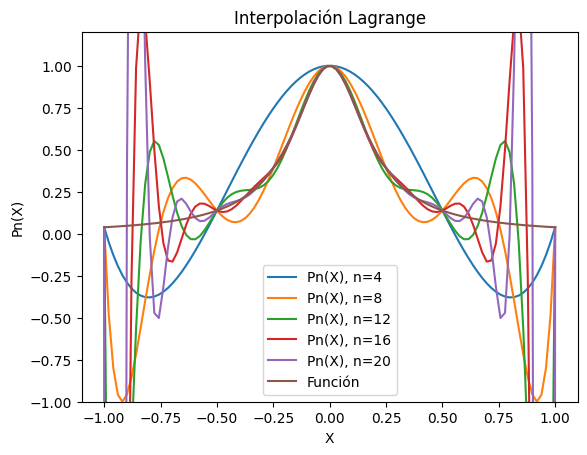

In [115]:
# 1):

# Número de puntos y definición de intervalo para gráfica:

n = [4,8,12,16,20]
x_valores= np.linspace(-1,1,100)

#Ciclo para determinar Polinomios de Lagrange:

for i in n:
  #Definición de intervalo pedido en ejercicio.
  x = np.linspace(-1, 1, i +1)
  #Función:
  f = 1/(1 + 25*(x**2))
  P = interpolate.lagrange(x, f)
  plt.plot(x_valores,P(x_valores), label=f'Pn(X), n={i}' )
  print('El polinomio de lagrange para ',i, 'es: ', '\n',P)
  print('\n')

#Definición de función y gráfica de la función y polinomio de Lagrange:
g= lambda x:  1/(1 + 25*(x**2))
plt.plot(x_valores, g(x_valores), label='Función')
plt.ylim(-1,1.2)      #Definición de límites para columna y.
plt.ylabel('Pn(X)')
plt.xlabel('X')
plt.title('Interpolación Lagrange')
plt.legend()
plt.show()

Error Para n=4, en el punto 0.5


In [152]:
#Puntos a tomar:
n=4

# Deefinición dada y polinomio por librería:
x = np.linspace(-1, 1, n +1)
y = 1/(1 + 25*(x**2))
l = interpolate.lagrange(x,y)

#Valor de X dado:
X=0.5

#Evaluación de polinomio de lagrange:
P_x =l(X)

#Evaluación de X en la función:
F_x = 1/(1 + 25*((0.5)**2))


j=1
for k in x:
  j *= (X-k)/math.factorial(5)
  j = j




print('Valor de lagrange P(X) es: ', P_x)
print('Valor de Función f(X) es: ', F_x)
print('El error es: ' , abs(F_x - P_x))



Valor de lagrange P(X) es:  0.13793103448275867
Valor de Función f(X) es:  0.13793103448275862
El error es:  5.551115123125783e-17
